In [2]:
## Import required lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import missingno

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
##Shape of the dateset
df.shape # there are 918 datapoints and 12 variables

(918, 12)

In [5]:
#check information about the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# view few datapoints from the dataset
df.head() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
## Convert dtype of age to object 

In [8]:
df['Age']=df['Age'].astype('object')

In [9]:
df._get_numeric_data() ## Fetch numeric data columns 

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,140,289,0,172,0.0,0
1,160,180,0,156,1.0,1
2,130,283,0,98,0.0,0
3,138,214,0,108,1.5,1
4,150,195,0,122,0.0,0
...,...,...,...,...,...,...
913,110,264,0,132,1.2,1
914,144,193,1,141,3.4,1
915,130,131,0,115,1.2,1
916,130,236,0,174,0.0,1


In [10]:
## fetch non numeric and categorical columns
df.select_dtypes('number').columns

Index(['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [11]:
df.describe()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
## Store numeric values in a variable for further use 
number=['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','HeartDisease']

In [13]:
# check unique values in non numeric data 
for i in df:
    if(i in number):
        print(i,'::',df[i].nunique())

RestingBP :: 67
Cholesterol :: 222
MaxHR :: 119
Oldpeak :: 53
HeartDisease :: 2


In [14]:
for i in df:
    if(i not in number and i!='Age' ):
        print(i,':', df[i].nunique(),'   :',df[i].unique())

Sex : 2    : ['M' 'F']
ChestPainType : 4    : ['ATA' 'NAP' 'ASY' 'TA']
FastingBS : 2    : [0 1]
RestingECG : 3    : ['Normal' 'ST' 'LVH']
ExerciseAngina : 2    : ['N' 'Y']
ST_Slope : 3    : ['Up' 'Flat' 'Down']


In [15]:
#['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','HeartDisease']
# convert non numberic data to using label encoding

In [16]:
# convert non numberic data to using label encoding
#import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex']) 
df['ChestPainType']= label_encoder.fit_transform(df['ChestPainType']) 
df['RestingECG']= label_encoder.fit_transform(df['RestingECG']) 
df['ExerciseAngina']= label_encoder.fit_transform(df['ExerciseAngina']) 
df['ST_Slope']= label_encoder.fit_transform(df['ST_Slope']) 

In [17]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [18]:
#Check number of null values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [19]:
  # Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


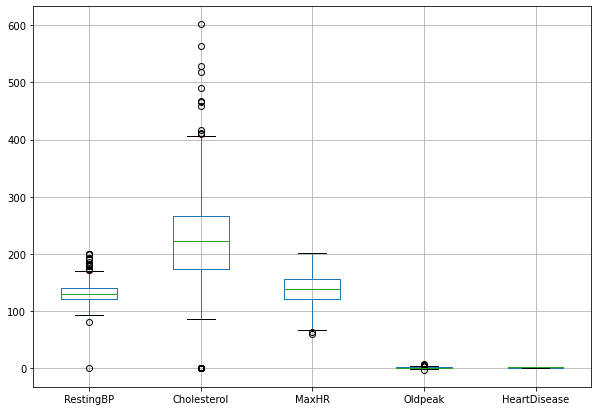

In [20]:
## heck and treat for outliers in numeric columns 
plt.figure(figsize=(10,7))
df[number].boxplot(return_type='axes');

**Create a user definded function for finding the lower and upper range for a variable so that outlier can be treated.**

In [21]:
def remove_outlier(col):
    global lower_range,upper_range
    Q1,Q3=df[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    res=df[df[col].between(lower_range,upper_range)]
    a=res[col].mean()
    df.loc[df[col]<lower_range,col]=a
    df.loc[df[col]>upper_range,col]=a
    return

In [22]:
for i in number:
    if (i!='HeartDisease'):
        remove_outlier(i)

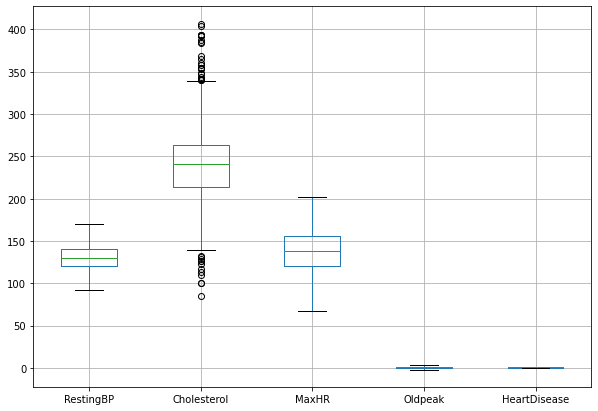

In [23]:
## Plot after outlier treatment
plt.figure(figsize=(10,7))
df[number].boxplot(return_type='axes');

In [24]:
# Check whether the data set is balanced or not
heart_0=df['HeartDisease'][df['HeartDisease']==0].count()
heart_1=df['HeartDisease'][df['HeartDisease']==1].count()
print('Heart Disease: 0 : ',heart_0)
print('Heart Disease: 1 : ',heart_1)
print('Heart Disease: 0 (%): ',(heart_0/(heart_0+heart_1))*100)
print('Heart Disease: 1 (%): ',(heart_1/(heart_0+heart_1))*100)

Heart Disease: 0 :  410
Heart Disease: 1 :  508
Heart Disease: 0 (%):  44.66230936819172
Heart Disease: 1 (%):  55.33769063180828


In [25]:
# From above we can interpret that the data set is not imbalanced

# Model Building

In [26]:
# Decision Tree Classification
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values


In [27]:
# Splitting the dataset into the Training set and Test set test size=.35
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size = 0.30, random_state = 1)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[49 1 2 ... 1 1.5 1]
 [50 1 0 ... 0 2.6 1]
 [57 1 2 ... 0 0.2 2]
 ...
 [63 1 0 ... 1 0.8334811529933482 2]
 [39 1 1 ... 1 1.0 1]
 [41 0 1 ... 0 0.0 2]]
[1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1
 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1
 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1
 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.47492345  0.51843486  1.25769767 ...  1.23192819  0.71162005
  -0.66523458]
 [-0.36745046  0.51843486 -0.82602337 ... -0.81173563  1.85646273
  -0.66523458]
 [ 0.38486042  0.51843486  1.25769767 ... -0.81173563 -0.64137584
   1.02283103]
 ...
 [ 1.02969832  0.51843486 -0.82602337 ...  1.23192819  0.01792985
   1.02283103]
 [-1.54965328  0.51843486  0.21583715 ...  1.23192819  0.19123702
  -0.66523458]
 [-1.33470731 -1.92888264  0.21583715 ... -0.81173563 -0.84952905
   1.02283103]]
[[ 0.4923334   0.51843486 -0.82602337 ... -0.81173563  0.01792985
  -2.35330018]
 [ 0.27738743  0.51843486 -0.82602337 ...  1.23192819  1.23200309
  -2.35330018]
 [-0.25997748  0.51843486 -0.82602337 ...  1.23192819  0.01792985
  -0.66523458]
 ...
 [ 1.45959025  0.51843486  2.29955819 ... -0.81173563 -0.84952905
  -0.66523458]
 [-0.1525045   0.51843486 -0.82602337 ...  1.23192819  0.71162005
  -0.66523458]
 [ 1.56706323  0.51843486  1.25769767 ...  1.23192819 -0.84952905
   1.02283103]]


In [29]:
## set Neighbour Value. squareroot of n
n=df['HeartDisease'].count()
k=np.sqrt(n)
print(k,'Max Neighbour Value')

30.298514815086232 Max Neighbour Value


In [30]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 17, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=17)

In [31]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)
print('Predicated',':','Actual')
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

Predicated : Actual
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]


In [32]:
# Making the Confusion Matrix and find accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)


[[ 94  15]
 [ 24 143]]


0.8586956521739131

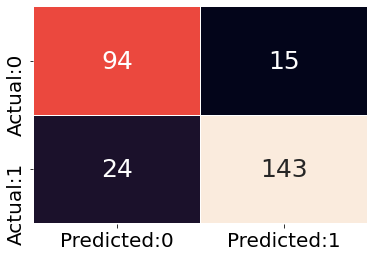

In [33]:
#Plot Confusion Matrix
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [34]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

In [35]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.9050632911392406

In [36]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall


0.8562874251497006

In [37]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.8623853211009175

In [38]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score


0.88

In [39]:
## Create a pickle file using serialization
import pickle
pickle_out=open("classifier.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()

In [40]:
classifier.predict([[40,1,1,140,289,0,1,172,0,0.0,2]])

array([0], dtype=int64)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    object 
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int32(5), int64(2), object(1)
memory usage: 68.3+ KB


In [42]:
df['MaxHR']=df['MaxHR'].astype('int64')

In [43]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160.0,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130.0,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138.0,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150.0,195.0,0,1,122,0,0.0,2,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    object 
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int32(5), int64(3), object(1)
memory usage: 68.3+ KB


In [45]:
df['Sex'][df['RestingECG']==0]

160    1
206    1
208    1
256    0
273    1
      ..
903    1
905    1
908    1
911    1
916    0
Name: Sex, Length: 188, dtype: int32